In [5]:
# import necessary modules
import numpy as np
from scipy import stats
from scipy.interpolate import interp1d as interp
import math
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import networkx as nx
from src.codonUtils import utils
from src.codonOptimizer import tableOptimizer
from src.codonTable import codonTable
from src.bacteria import strain
from src.thunderflask import thunderflask
import pickle
import subprocess
from tqdm import tqdm_notebook

In [2]:
sim = tableOptimizer()
# preallocate memory for statistics
# perform N trials
ct, *dummy = sim.GDA(subFunc='Gilis')
californiaCode = codonTable(ct)

In [6]:
# initialize some variables
T_curr = 0
mut_param = [1, 2]
dt = 0.1
N_sims = 10
T_sim = 1000
t_extra = 5
date = '3-6'
code = 'California Code'
filepath = 'res/2-14 Traces'
filename = '{0}_{1}_favg_traces_T={2}_N={3}_b={4}_l={5}.pickle'.format(date,
                                                                       code,
                                                                       T_sim,
                                                                       N_sims,
                                                                      mut_param[0],
                                                                      mut_param[1]) 
# initialize list of dictionaries of arrays (i know, it's too much) 
dataframes = []
newtimes = np.linspace(0, T_sim, int((T_sim)/dt))
# run N simulations
for i in tqdm_notebook(range(N_sims), desc='Simulation Number: '):
    LUCA = strain(N_pop=1e6, table=californiaCode, fitness=0, mu=2e-5)
    sim = thunderflask(LUCA)
    sim.simulate(T_sim+t_extra, dt, T_curr, mut_param, show_progress='notebook')
    t = sim.f_avgtrace['timepoints']
    f_avg = sim.f_avgtrace['f_avg']
    interp_fxn = interp(t, f_avg)
    newf = interp_fxn(newtimes)
    df = pd.DataFrame({
        'time' : newtimes, 
        'value' : newf, 
        'sim' : [i for j in range(len(newf))],
        'code' : [code for j in range(len(newf))]
    })
    dataframes.append(df)
# package data into pandas dataframe
df_cal = pd.concat(dataframes)

HBox(children=(IntProgress(value=0, description='Simulation Number: : ', max=10), HTML(value='')))

Iteration Number: :   5%|▍         | 482/10050 [00:04<03:18, 48.18it/s]

Iteration Number: : 100%|██████████| 10050/10050 [02:53<00:00, 58.00it/s]

NameError: name 'df_sc' is not defined

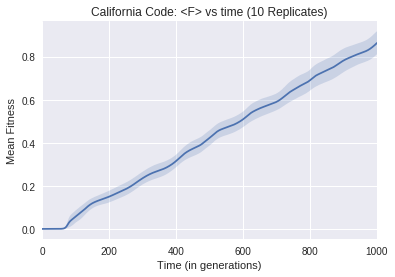

done


In [7]:
# # pickle results
# with open('{0}/{1}'.format(filepath, filename), 'wb') as handle:
#     pickle.dump(df_sc, handle)
# plot results
ax = sns.tsplot(data=df_cal, time='time', value='value', unit='sim')
plt.title('{0}: <F> vs time ({1} Replicates)'.format(code, N_sims))
plt.xlabel('Time (in generations)')
plt.ylabel('Mean Fitness')
plt.show()
print('done')

In [ ]:
# compare data to colorado code performance
